In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'E:\programming\dataset\Into_to_statstical_learning\Auto.csv')
print(data.shape)
data.head()

(397, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [4]:
data['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [5]:
data['horsepower'] = data['horsepower'].replace('?',np.nan)

In [6]:
data = data.dropna()

In [7]:
data['horsepower'] = data['horsepower'].astype('int')

In [8]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int32
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [32]:
scores = []
n = len(data)
for power in range(1,11):
    poly = PolynomialFeatures(power,include_bias=False)
    X = poly.fit_transform(data['horsepower'].to_frame())
    y = data['mpg']
    lr = LinearRegression()
    scores.append(cross_val_score(lr,X,y,cv = n,scoring = 'neg_mean_squared_error').mean())

In [33]:
scores = list(map(abs,scores))
powers = np.arange(1,11)

C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(15, 28)

<Figure size 864x432 with 0 Axes>

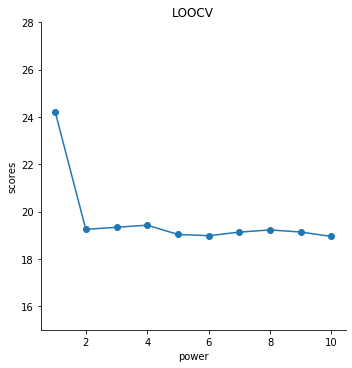

In [34]:
temp = pd.DataFrame({"power":powers,'scores':scores})
plt.figure(figsize = (12,6))
g = sns.FacetGrid(data = temp,size=5)
g.map(plt.scatter, 'power' , 'scores')
g.map(plt.plot, 'power', 'scores')
plt.title('LOOCV')
plt.ylim(15,28)

In [35]:
scores_list = []
from sklearn.utils import shuffle
for _ in range(10):
    scores = []
    n = len(data)
    for power in range(1,11):
        poly = PolynomialFeatures(power,include_bias=False)
        X = poly.fit_transform(data['horsepower'].to_frame())
        y = data['mpg']
        X,y = shuffle(X,y)
        lr = LinearRegression()
        scores.append(cross_val_score(lr,X,y,cv = 10,scoring = 'neg_mean_squared_error').mean())
    scores_list.append(list(map(abs,scores)))    

In [36]:
powers = np.arange(1,11)

In [37]:
data_dict = {'Scores'+ str(i):scores_list[i] for i in range(10)}
temp = pd.DataFrame(data_dict)
temp.index = powers

In [38]:
temp.head()

,Scores0,Scores1,Scores2,Scores3,Scores4,Scores5,Scores6,Scores7,Scores8,Scores9
1,24.203264,24.157633,24.209870,24.231662,24.259720,24.151541,24.128923,24.357917,24.264865,24.147533
2,19.288139,19.354763,19.319733,19.445964,19.099661,19.230037,19.221715,19.338735,19.238891,19.170679
3,19.303618,19.517461,19.423642,19.482946,19.445683,19.320762,19.253842,19.332350,19.211552,19.535712
4,19.644022,19.483272,19.207402,19.241446,19.248328,19.534379,19.438380,19.550736,19.550026,19.442406
5,18.941690,19.215959,19.221399,18.806800,18.850921,19.082429,19.288344,19.540824,18.929547,19.089901


Text(0, 0.5, 'Error')

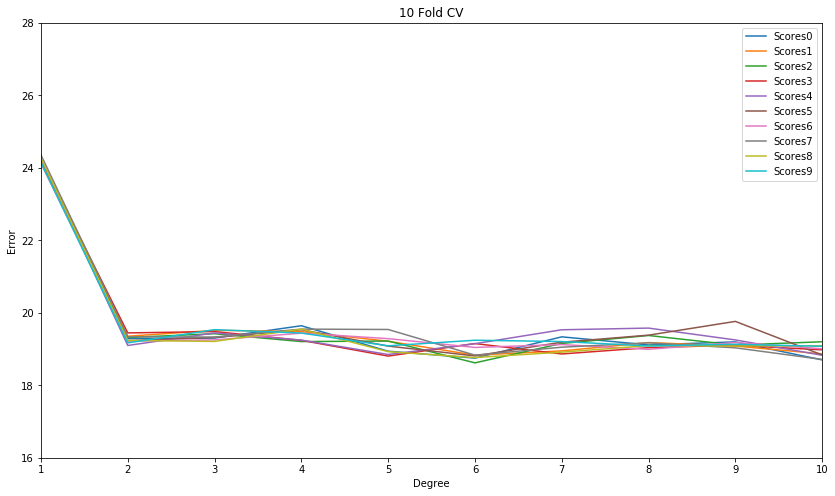

In [41]:
temp.plot.line(figsize = (14,8))
plt.ylim(16,28)
plt.title('10 Fold CV')
plt.xlabel('Degree')
plt.ylabel('Error')